Online payment system offers numerous advantages including convenience, 24/7 accessibility, speed, security, tracking transactions and many more. But it also leads to payment fraudulent activities sometimes. To maintain trust and reduce financial losses, online payment fraud detection is necessary. 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset
df = pd.read_csv('onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


This dataset includes features such as:

**step:** represents a unit of time where 1 step equals 1 hour

**type:** type of online transaction

**amount:** the amount of the transaction

**nameOrig:** customer starting the transaction

**oldbalanceOrg:** balance before the transaction

**newbalanceOrig:** balance after the transaction

**nameDest:** recipient of the transaction

**oldbalanceDest:** initial balance of recipient before the transaction

**newbalanceDest:** the new balance of recipient after the transaction

**isFraud:** fraud transaction (ACTUAL FRAUD STATUS)

**isFlaggedFraud:** the indicator which the simulation is used to flag the transaction using some threshold value

In [3]:
df.shape

(6362620, 11)

In [4]:
# information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# summary statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# check null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# check duplicate values
df.duplicated().sum()

0

# Visualization

In [8]:
# check how many types of transactions are present
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of types of transactions')

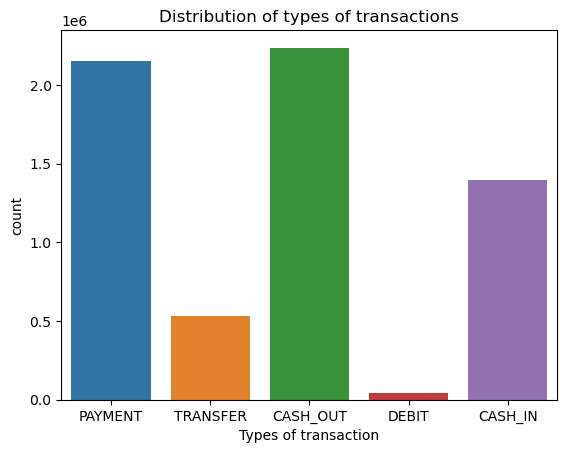

In [9]:
import seaborn as sns

sns.countplot(data = df, x = 'type')
plt.xlabel('Types of transaction')
plt.title('Distribution of types of transactions')

Dataset contains more transactions of cash_out and payment than cash_in and transfer types. Debit is almost negligible.

Text(0.5, 1.0, 'Distribution of transaction amount')

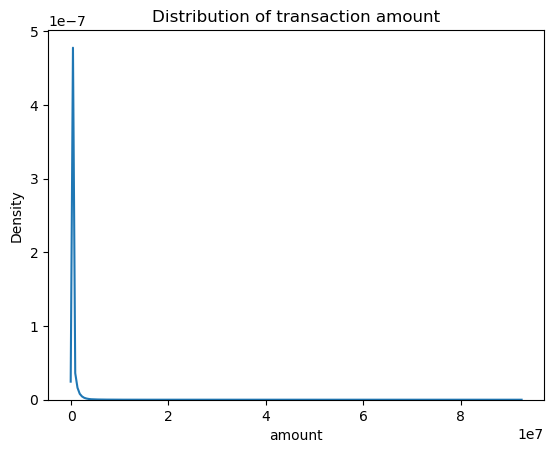

In [10]:
sns.kdeplot(df['amount'])
plt.title('Distribution of transaction amount')

Distribution of amount is right skewed indicating outliers are present after 100,000,000 amount and mode < median < mean.

In [11]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

Initially there are 6353307 number of customers.

Text(0.5, 1.0, 'Distribution of the balance amount (before transaction)')

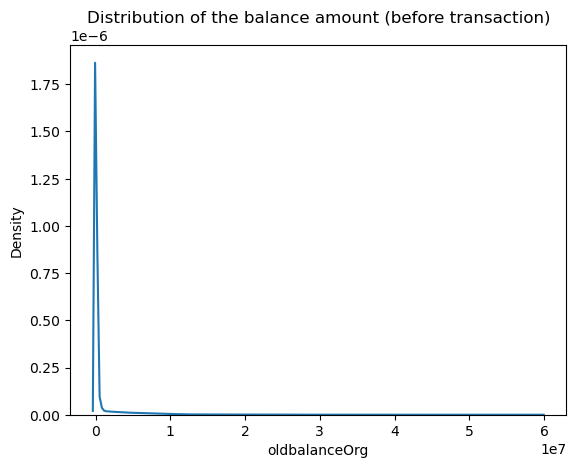

In [12]:
sns.kdeplot(df['oldbalanceOrg'])
plt.title('Distribution of the balance amount (before transaction)')

Pre-transaction balance distribution is also right skewed.

Text(0.5, 1.0, 'Distribution of the balance amount (after transaction)')

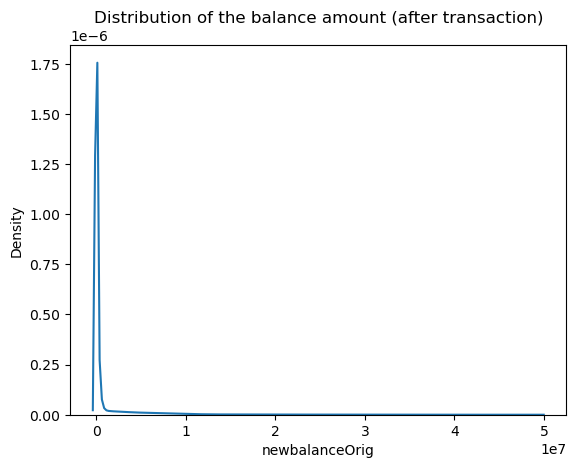

In [13]:
sns.kdeplot(df['newbalanceOrig'])
plt.title('Distribution of the balance amount (after transaction)')

Post-transaction balance is right-skewed.

In [14]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

There are 2722362 recipients.

Before performing any steps to handle the outliers or imbalanced dataset, we need to encode the object columns

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

A log transformation is a statistical technique that can be used to reduce skewness in a measurement variable. 

Through experiments, it is proven that log transforms performs so well on the right-skewed data. It transforms the right-skewed data into normally distributed data so well.

In [16]:
from sklearn.preprocessing import FunctionTransformer
transform = FunctionTransformer(func = np.log1p)
transformed_df = transform.fit_transform(df)

Text(0.5, 1.0, 'Distribution of transaction amount after log transformation')

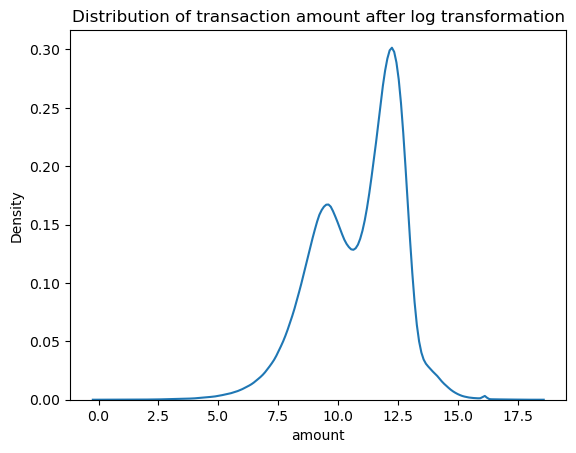

In [17]:
sns.kdeplot(transformed_df['amount'])
plt.title('Distribution of transaction amount after log transformation')

Text(0.5, 1.0, 'Distribution of the balance amount (after transaction) after log transformation')

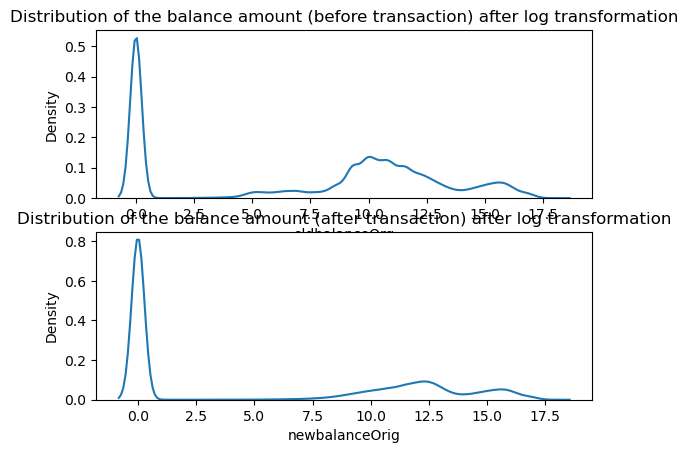

In [18]:
fig, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(transformed_df['newbalanceOrig'], ax = ax2)
sns.kdeplot(transformed_df['oldbalanceOrg'], ax = ax1)
ax1.set_title('Distribution of the balance amount (before transaction) after log transformation')
ax2.set_title('Distribution of the balance amount (after transaction) after log transformation')

Dataset is somewhat less skewed after log transformation.

Text(0.5, 1.0, 'Fraud count')

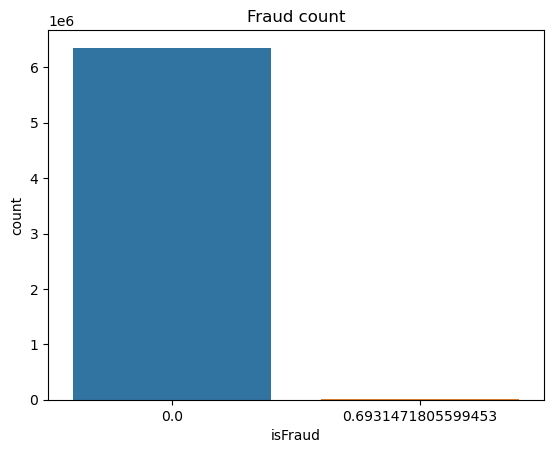

In [19]:
sns.countplot(data = transformed_df, x = 'isFraud')
plt.title('Fraud count')


In [20]:
transformed_df['isFraud'].value_counts()

isFraud
0.000000    6354407
0.693147       8213
Name: count, dtype: int64

There are more non-fradulent data than fradulent data.
Dataset is highly imbalanced.

But, following oversampling method will increase the number of records a lot, and undersampling will lead to loss of information. There are few algorithms such as bagging or boosting models which are robust to class imbalnace. Some of them include ensemble methods, decision tree, random forest, xgboost.

In [21]:
transformed_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.693147,1.386294,9.194276,13.538267,12.044359,11.984786,14.323589,0.000000,0.0,0.000000,0.0
1,0.693147,1.386294,7.531166,14.598955,9.964112,9.872292,14.365898,0.000000,0.0,0.000000,0.0
2,0.693147,1.609438,5.204007,13.817665,5.204007,0.000000,12.993816,0.000000,0.0,0.693147,0.0
3,0.693147,0.693147,5.204007,15.578230,5.204007,0.000000,12.878244,9.960954,0.0,0.693147,0.0
4,0.693147,1.386294,9.364703,15.052719,10.634773,10.305174,13.627879,0.000000,0.0,0.000000,0.0


In [22]:
X = transformed_df.drop(columns = ['isFraud','isFlaggedFraud'])
Y = transformed_df['isFraud']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.2, random_state = 32)

print('xtrain :',xtrain.shape)
print('ytrain :',ytrain.shape)
print('xtest :',xtest.shape)
print('ytest :',ytest.shape)

xtrain : (5090096, 9)
ytrain : (5090096,)
xtest : (1272524, 9)
ytest : (1272524,)


In [23]:
# models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [24]:
# import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
ytrain = le.fit_transform(ytrain)
ytest = le.fit_transform(ytest)

In [26]:
models = [LogisticRegression(random_state = 32),
          RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 32),
          XGBClassifier(random_state = 32)]

for i in range(len(models)):
    model = models[i].fit(xtrain,ytrain)
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)
    print(models[i],'->')
    print('Training accuracy : ', accuracy_score(ytrain,ytrain_pred)*100)
    print('Testing accuracy : ',accuracy_score(ytest,ytest_pred)*100)
    print()

LogisticRegression(random_state=32) ->
Training accuracy :  99.93440202306597
Testing accuracy :  99.93760432023286

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=32) ->
Training accuracy :  99.99622796898133
Testing accuracy :  99.96990233583021

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tr

In [27]:
confusion_matrix(ytest,ytest_pred)

array([[1270854,      54],
       [    252,    1364]], dtype=int64)

All models show similar accuracy, but XG Boost is the best performed model.

Dataset: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

Reference: 
- https://github.com/seuwenfei/Online-payment-fraud-detection
- https://www.geeksforgeeks.org/feature-transformation-techniques-in-machine-learning/
- https://www.geeksforgeeks.org/online-payment-fraud-detection-using-machine-learning-in-python/